In [1]:
#import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy
import scikit_posthocs as sp
from scipy import stats
import seaborn as sns
%matplotlib inline
fn=glob.glob("*.xlsx")
print(fn)

['Chris_Malva_data.xlsx', 'MalvaAll.xlsx']


In [2]:
FA=pd.read_excel(fn[1], sheet_name='8-all')
FB=pd.read_excel(fn[1], sheet_name='8-only')

In [3]:
COLS=list(FA.columns.values)

In [4]:
print(COLS)
SP=list(set(FA['Species']))

['Species', 'Individual', 'Date', 'Pedicel lgt.', 'Pedicel Foot', 'Bract L', 'Bract Radius', 'Bract W', 'Sepal lgt.', 'Corolla lgt.', 'Petal Notch', 'Tip width', 'Calyx Diameter', 'Calyx W', 'L Free Sepal', 'W Sepal (max)', 'W Fused Sepal', 'Claw', 'Petal L', 'Petal W', 'Stam Col', 'Ovule No.']


In [5]:
COLSb=list(FB.columns.values)
print(COLSb)

['Species', 'Individual', 'Date', 'Pedicel lgt.', 'Bract L', 'Bract W', 'Sepal lgt.', 'Calyx Diameter', 'W Sepal (max)', 'Petal L', 'Petal W']


In [6]:
FA['Petal Notch'][118]=2.2

/home/carlos/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
FA['Petal Notch'][118]

2.2

In [8]:
PDX=FA[COLSb]

In [9]:
PDX

,Species,Individual,Date,Pedicel lgt.,Bract L,Bract W,Sepal lgt.,Calyx Diameter,W Sepal (max),Petal L,Petal W
0,Arborea,LA98C:01,1998-05-13 00:00:00,20.00,10.00,9.00,8.00,11.0,4.00,20.0,18.00
1,Arborea,LA02L:02,2002-07-14 00:00:00,9.00,5.00,5.00,6.00,6.0,2.00,14.0,11.00
2,Arborea,LA08L:CG01,2008-05-22 00:00:00,17.40,7.00,7.40,8.50,9.0,3.40,16.8,13.00
3,Arborea,LA08L:CG01,2008-05-31 00:00:00,11.70,6.10,6.50,7.70,7.0,2.90,16.5,11.40
4,Arborea,LA10L:CG01,2010-05-18 00:00:00,13.80,6.00,8.30,8.00,9.0,3.80,16.3,14.00
5,Arborea,LA10L:01,2010-05-22 00:00:00,19.40,5.50,9.00,8.00,9.0,3.40,18.2,14.00
6,Arborea,LA11L:EC01,2011-04-28 00:00:00,11.20,6.20,9.20,8.20,7.2,3.70,18.9,14.30
7,Arborea,LA19L:02,2019-05-07 00:00:00,23.10,7.90,13.60,8.90,9.7,4.20,21.7,16.50
8,Arborea,LA19L:02,2019-05-07 00:00:00,20.70,7.90,12.40,8.30,9.4,4.70,22.4,18.00
9,Durieui,LM97M:01,1997-06-04 00:00:00,12.00,7.50,3.00,12.00,15.0,6.50,16.0,10.00


In [10]:
PDX.drop(["Individual","Date"],axis=1)

,Species,Pedicel lgt.,Bract L,Bract W,Sepal lgt.,Calyx Diameter,W Sepal (max),Petal L,Petal W
0,Arborea,20.00,10.00,9.00,8.00,11.0,4.00,20.0,18.00
1,Arborea,9.00,5.00,5.00,6.00,6.0,2.00,14.0,11.00
2,Arborea,17.40,7.00,7.40,8.50,9.0,3.40,16.8,13.00
3,Arborea,11.70,6.10,6.50,7.70,7.0,2.90,16.5,11.40
4,Arborea,13.80,6.00,8.30,8.00,9.0,3.80,16.3,14.00
5,Arborea,19.40,5.50,9.00,8.00,9.0,3.40,18.2,14.00
6,Arborea,11.20,6.20,9.20,8.20,7.2,3.70,18.9,14.30
7,Arborea,23.10,7.90,13.60,8.90,9.7,4.20,21.7,16.50
8,Arborea,20.70,7.90,12.40,8.30,9.4,4.70,22.4,18.00
9,Durieui,12.00,7.50,3.00,12.00,15.0,6.50,16.0,10.00


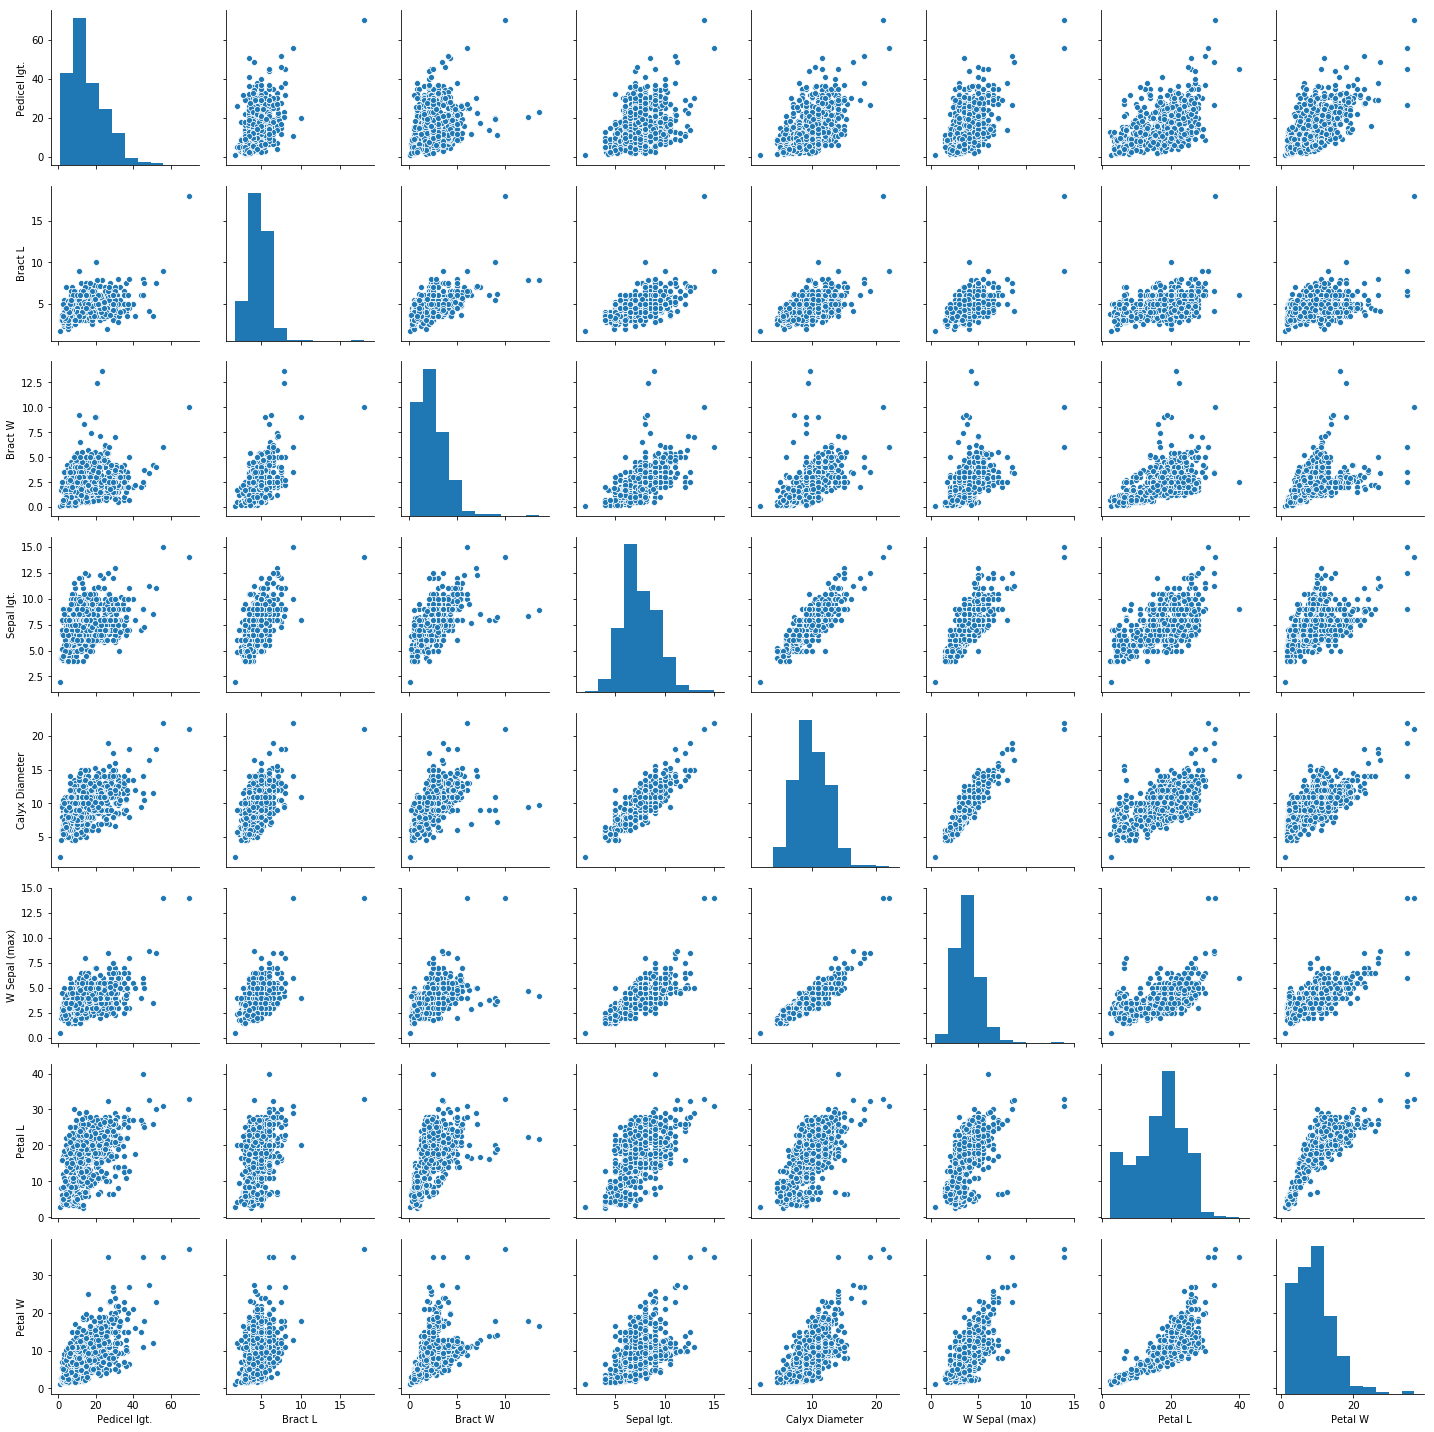

In [11]:
#fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.pairplot(PDX)


In [12]:
corr = PDX.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pedicel lgt.,Bract L,Bract W,Sepal lgt.,Calyx Diameter,W Sepal (max),Petal L,Petal W
Pedicel lgt.,1,0.459023,0.330502,0.438029,0.562534,0.564611,0.568583,0.65172
Bract L,0.459023,1,0.553031,0.571201,0.580679,0.563124,0.436523,0.457621
Bract W,0.330502,0.553031,1,0.681971,0.590244,0.524727,0.554968,0.459555
Sepal lgt.,0.438029,0.571201,0.681971,1,0.858276,0.741795,0.606314,0.501825
Calyx Diameter,0.562534,0.580679,0.590244,0.858276,1,0.899853,0.677642,0.693025
W Sepal (max),0.564611,0.563124,0.524727,0.741795,0.899853,1,0.620582,0.724757
Petal L,0.568583,0.436523,0.554968,0.606314,0.677642,0.620582,1,0.843363
Petal W,0.65172,0.457621,0.459555,0.501825,0.693025,0.724757,0.843363,1


In [13]:
PDU=FA[COLSb]
#SP

In [14]:
#PDUX=PDU.loc[PDU["Species"].isin(["Neglecta"])]
#df.loc[df['B'].isin(['one','three'])])

In [15]:
PDUX=PDU.loc[PDU["Species"].isin(["Neglecta","Neglecta_X_sylvestris","Neglecta_+_sylvestris"
                                  ,"Sylvestris_+_neglecta"
                                  ,"Sylvestris_X_neglecta","Sylvestris"])]
                                
#,"Neglecta_+_sylvestris","Sylvestris_+_neglecta","Sylvestris_X_neglecta","Sylvestris"])]

In [16]:
#plt.figure(figsize=(10,10))
#ax = sns.scatterplot(x="Sepal lgt.", y="Calyx Diameter", hue="Species", data=PDUX)

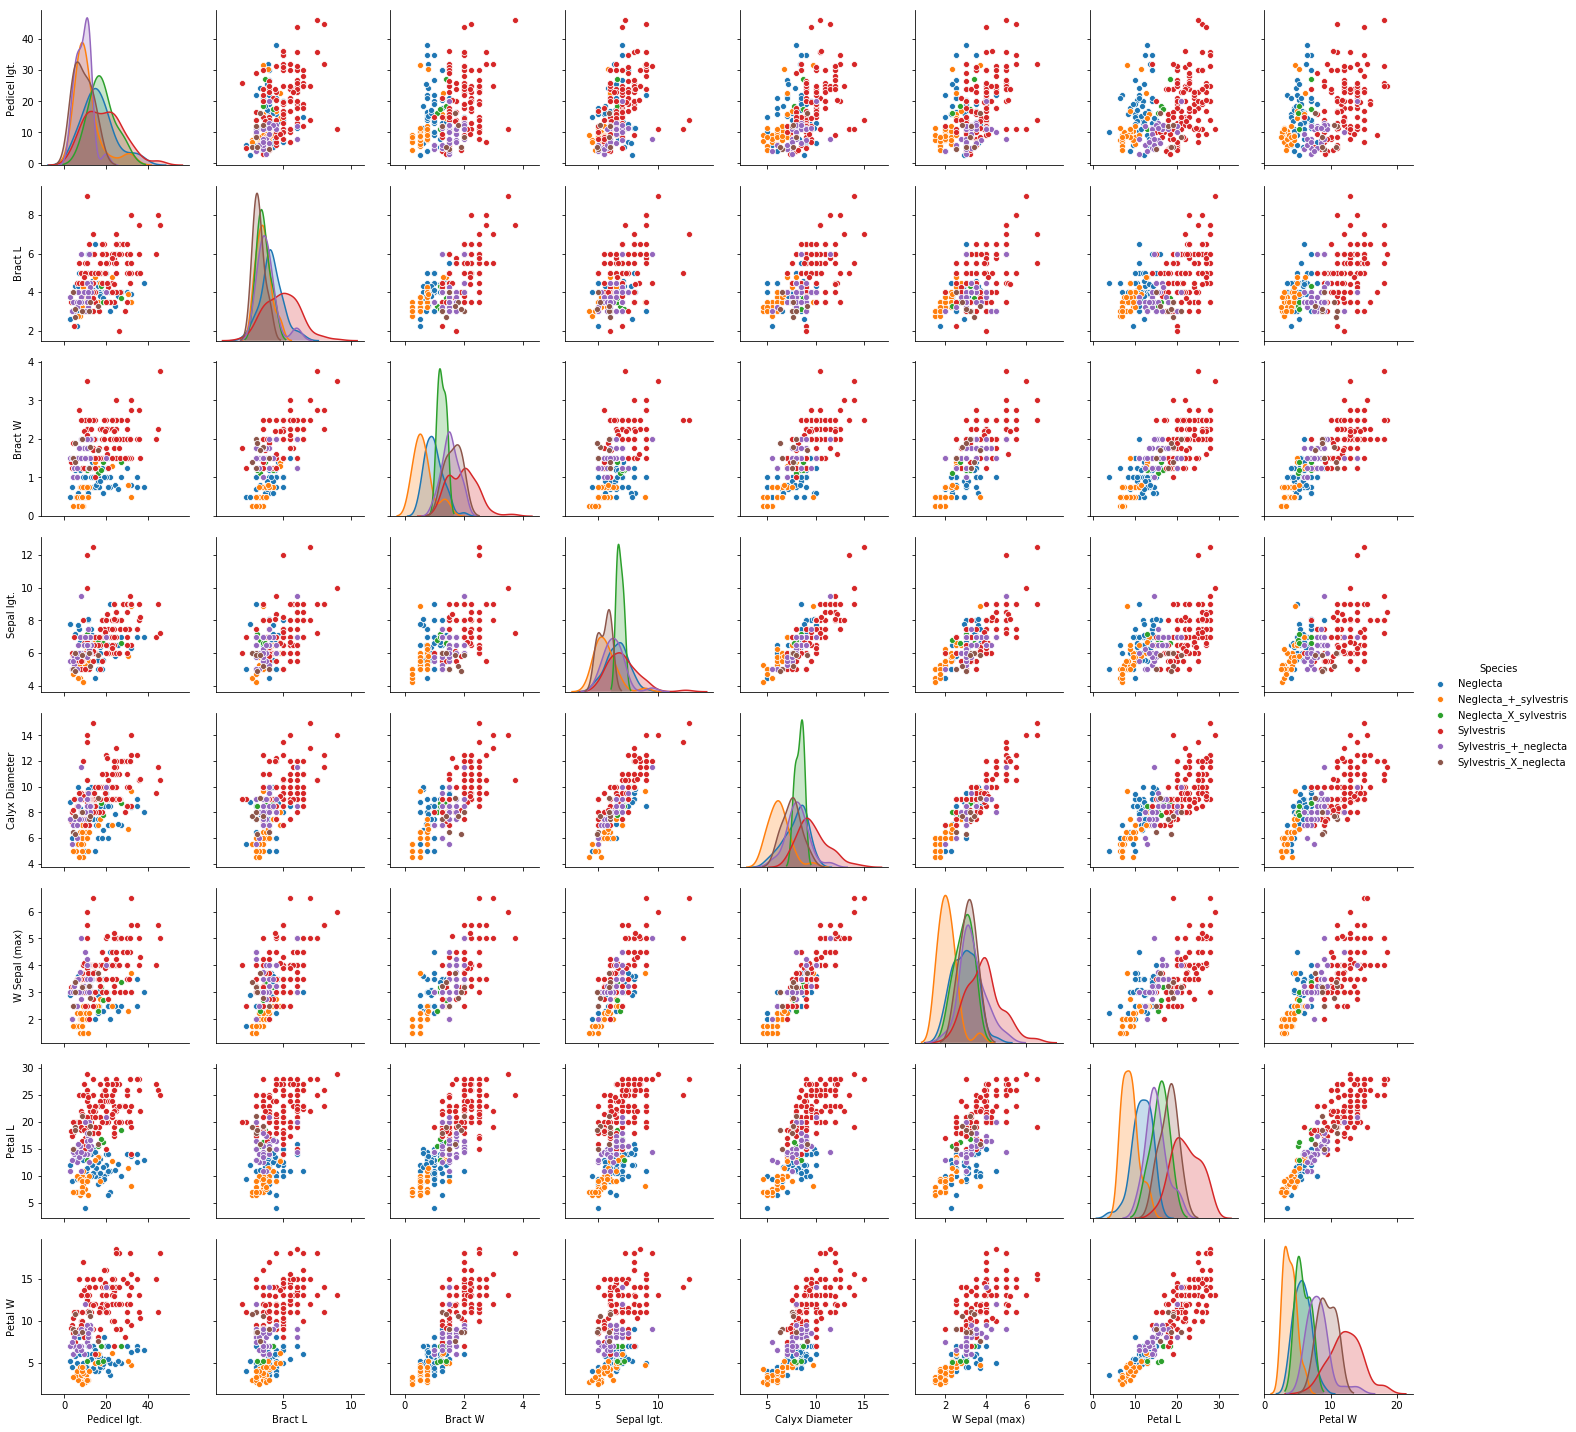

In [17]:
#fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.pairplot(PDUX,hue="Species")

In [18]:
corr = PDUX.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pedicel lgt.,Bract L,Bract W,Sepal lgt.,Calyx Diameter,W Sepal (max),Petal L,Petal W
Pedicel lgt.,1,0.485532,0.356213,0.465552,0.49529,0.456881,0.389856,0.376275
Bract L,0.485532,1,0.639164,0.54032,0.607515,0.577314,0.504398,0.537291
Bract W,0.356213,0.639164,1,0.50056,0.732228,0.76366,0.777332,0.812956
Sepal lgt.,0.465552,0.54032,0.50056,1,0.843352,0.754455,0.518769,0.48908
Calyx Diameter,0.49529,0.607515,0.732228,0.843352,1,0.902049,0.748898,0.744874
W Sepal (max),0.456881,0.577314,0.76366,0.754455,0.902049,1,0.758775,0.753857
Petal L,0.389856,0.504398,0.777332,0.518769,0.748898,0.758775,1,0.907201
Petal W,0.376275,0.537291,0.812956,0.48908,0.744874,0.753857,0.907201,1


In [19]:
PDUXX=PDU.loc[PDU["Species"].isin(["Neglecta","Sylvestris_X_neglecta","Sylvestris"])]

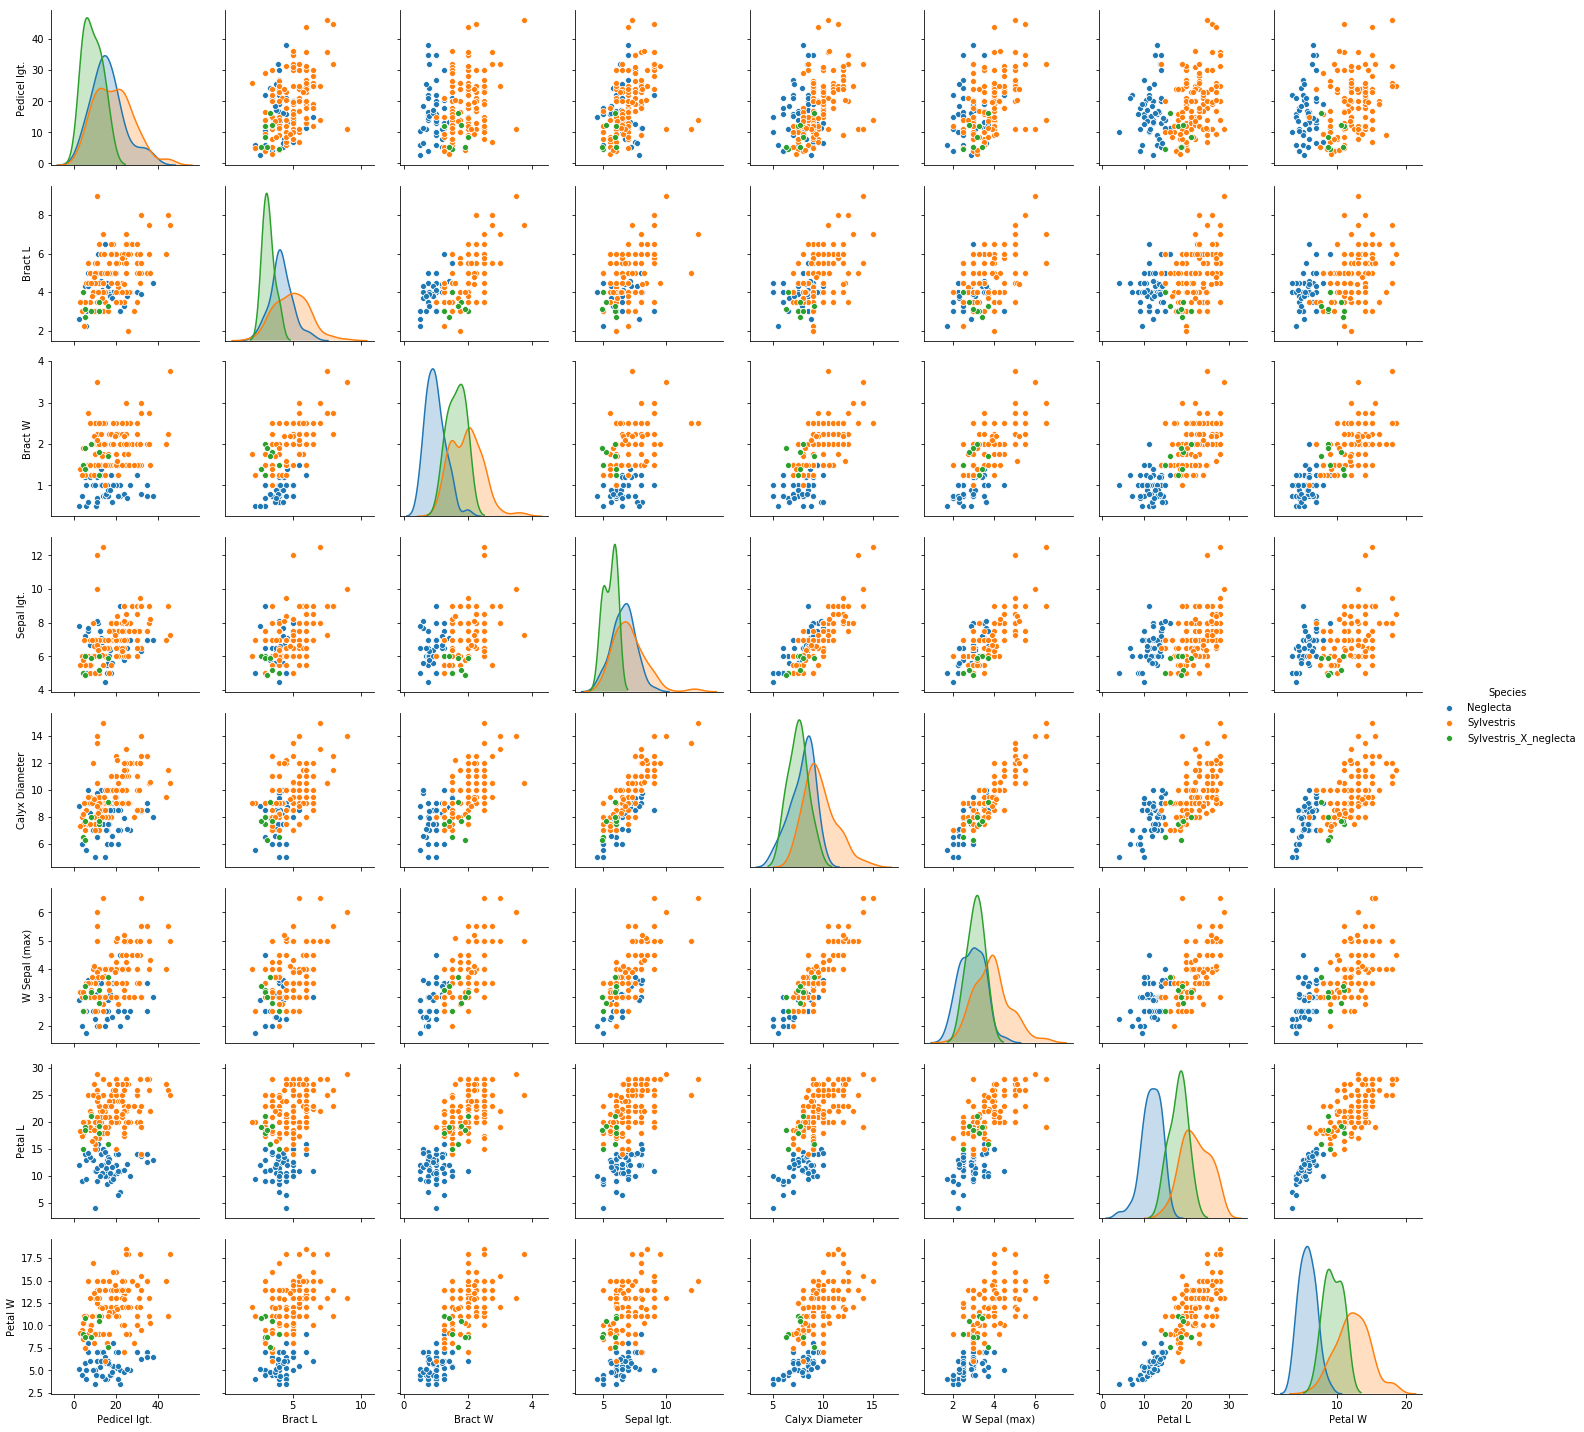

In [20]:
#fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.pairplot(PDUXX,hue="Species")

In [21]:
#plt.figure(figsize=(10,10))

#ax = sns.scatterplot(x="Petal W", y="Petal L", hue="Species", data=PDUXX)

In [22]:
#print(SP[4])
#s1=FA.loc[FA['Species']==SP[4]]
#s1.drop(["Species","Individual","Date"],axis=1)

In [23]:
#corr = s1.corr()
#corr.style.background_gradient(cmap='coolwarm')

# PDUX LDA

In [29]:
print(set(PDUX["Species"]))
An=list(PDUX)
print(An[1:len(An)])
Bn=An[3:len(An)]
print(An[0])
print(Bn)

{'Sylvestris_+_neglecta', 'Neglecta_+_sylvestris', 'Neglecta', 'Sylvestris', 'Sylvestris_X_neglecta', 'Neglecta_X_sylvestris'}
['Individual', 'Date', 'Pedicel lgt.', 'Bract L', 'Bract W', 'Sepal lgt.', 'Calyx Diameter', 'W Sepal (max)', 'Petal L', 'Petal W']
Species
['Pedicel lgt.', 'Bract L', 'Bract W', 'Sepal lgt.', 'Calyx Diameter', 'W Sepal (max)', 'Petal L', 'Petal W']


In [60]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=3)
lda = LinearDiscriminantAnalysis(n_components=3)
pca.fit(PDUX[Bn])
lda.fit(PDUX[Bn],PDUX[An[0]])
#print(lda.priors_)
#print(lda.means_)
print(lda.coef_)
print(lda.explained_variance_ratio_)
print(lda.classes_)

[[ 0.05345582  0.87870896 -4.06277447  0.99037254  0.04684861  0.79382833
  -0.7316146  -0.45545616]
 [ 0.03357566  1.064557   -4.68094796  1.49756982 -0.76024473  0.36337989
  -0.83732098 -0.51535059]
 [ 0.09162519 -0.8993567   1.1263202   0.99408423  0.52766535 -1.91897778
   0.28780798 -1.20301678]
 [-0.00946784 -0.38167013  2.3538966  -0.884098    0.34132435 -0.82632295
   0.56948532  0.4062795 ]
 [-0.09927876 -0.63997188  1.68180737  0.23871269 -0.63606734  1.72367705
  -0.23633817 -0.08733474]
 [-0.07128396 -1.77585164  4.43501882 -0.83489984 -0.74505291  0.72891534
   0.39544392  0.08911458]]
[0.90944401 0.05664844 0.01798722]
['Neglecta' 'Neglecta_+_sylvestris' 'Neglecta_X_sylvestris' 'Sylvestris'
 'Sylvestris_+_neglecta' 'Sylvestris_X_neglecta']


In [47]:
MUPCA=pd.DataFrame(pca.transform(PDUX[Bn]), columns=['PCA%i' % i for i in range(1,4)], index=PDUX[Bn].index)
MULDA=pd.DataFrame(lda.transform(PDUX[Bn]), columns=['LDA%i' % i for i in range(1,4)], index=PDUX[Bn].index)

In [48]:
MUPCA["Species"]=PDUX["Species"]
MULDA["Species"]=PDUX["Species"]

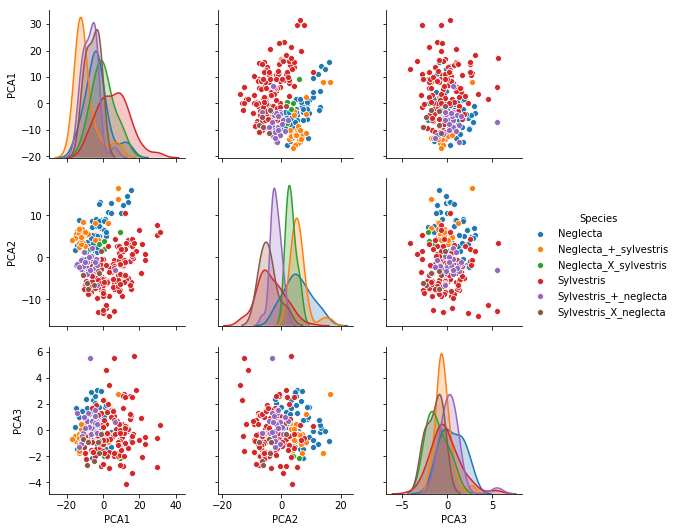

In [49]:
sns.pairplot(MUPCA,hue="Species")

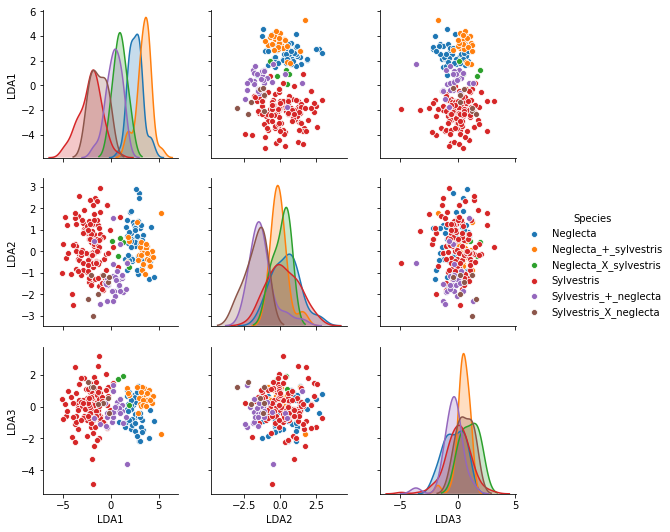

In [50]:
sns.pairplot(MULDA,hue="Species")